### Name - **Naimish Sharma**
### Roll No. - **18151**
### Department - **EECS**

# Title - **Maximizing Agricultural Yield by Recommending Appropriate Crops**

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

Loading Dataset

In [28]:
data = pd.read_csv("C:/Users/naimi/OneDrive/Desktop/Python Final Project/Crop_recommendation.csv")
data.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


Statistical Summary of Data

In [3]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Checking for null values in data

In [4]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Checking shape of the data

In [5]:
data.shape

(2200, 8)

Checking unique types of crops given in data

In [6]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Counting number of rows of data provided for each crop

In [7]:
data['label'].value_counts()

cotton         100
lentil         100
mango          100
pigeonpeas     100
orange         100
apple          100
mungbean       100
mothbeans      100
coconut        100
kidneybeans    100
maize          100
grapes         100
rice           100
papaya         100
muskmelon      100
jute           100
watermelon     100
banana         100
coffee         100
pomegranate    100
blackgram      100
chickpea       100
Name: label, dtype: int64

Checking if features are correlated

In [8]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Text(0.5, 15.0, 'Features')

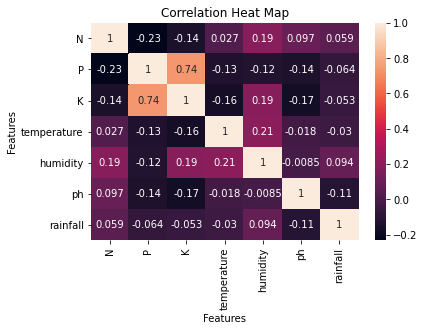

In [9]:
dataplot = sns.heatmap(data.corr(), annot=True)
dataplot.title.set_text("Correlation Heat Map")
dataplot.set_ylabel("Features")
dataplot.set_xlabel("Features")

### Data Visualization

array([[<AxesSubplot:xlabel='N', ylabel='N'>,
        <AxesSubplot:xlabel='P', ylabel='N'>,
        <AxesSubplot:xlabel='K', ylabel='N'>,
        <AxesSubplot:xlabel='temperature', ylabel='N'>,
        <AxesSubplot:xlabel='humidity', ylabel='N'>,
        <AxesSubplot:xlabel='ph', ylabel='N'>,
        <AxesSubplot:xlabel='rainfall', ylabel='N'>],
       [<AxesSubplot:xlabel='N', ylabel='P'>,
        <AxesSubplot:xlabel='P', ylabel='P'>,
        <AxesSubplot:xlabel='K', ylabel='P'>,
        <AxesSubplot:xlabel='temperature', ylabel='P'>,
        <AxesSubplot:xlabel='humidity', ylabel='P'>,
        <AxesSubplot:xlabel='ph', ylabel='P'>,
        <AxesSubplot:xlabel='rainfall', ylabel='P'>],
       [<AxesSubplot:xlabel='N', ylabel='K'>,
        <AxesSubplot:xlabel='P', ylabel='K'>,
        <AxesSubplot:xlabel='K', ylabel='K'>,
        <AxesSubplot:xlabel='temperature', ylabel='K'>,
        <AxesSubplot:xlabel='humidity', ylabel='K'>,
        <AxesSubplot:xlabel='ph', ylabel='K'>,
        <A

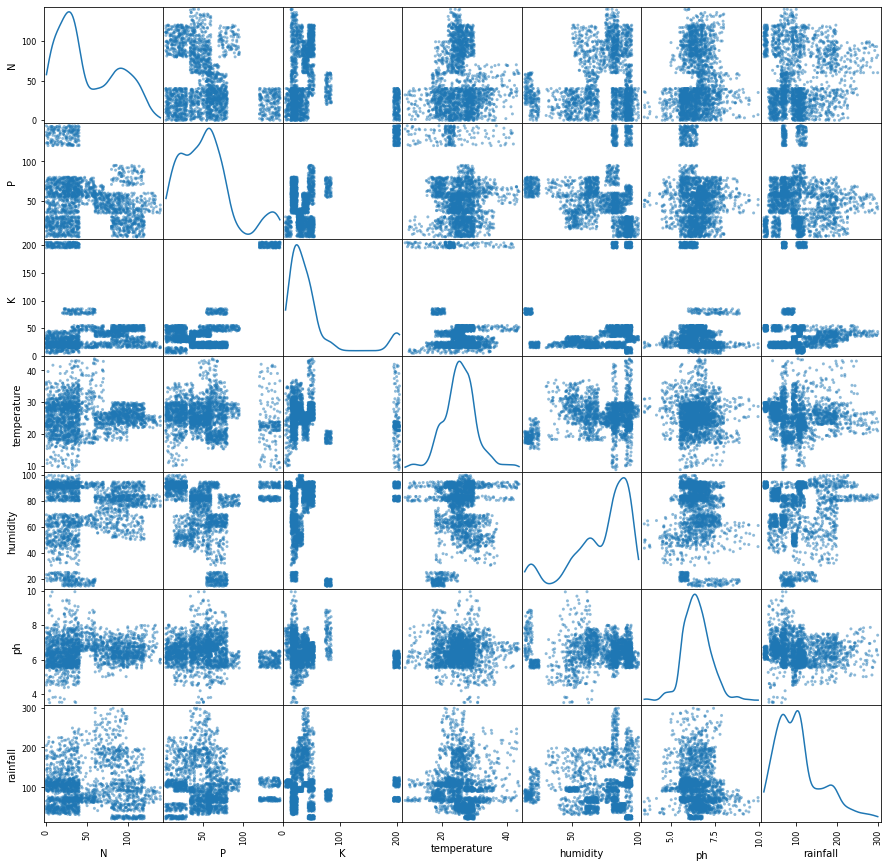

In [10]:
pd.plotting.scatter_matrix(data,figsize=(15,15),grid=True,diagonal='kde')

Text(0.5, 1.0, 'Rainfall(in mm)')

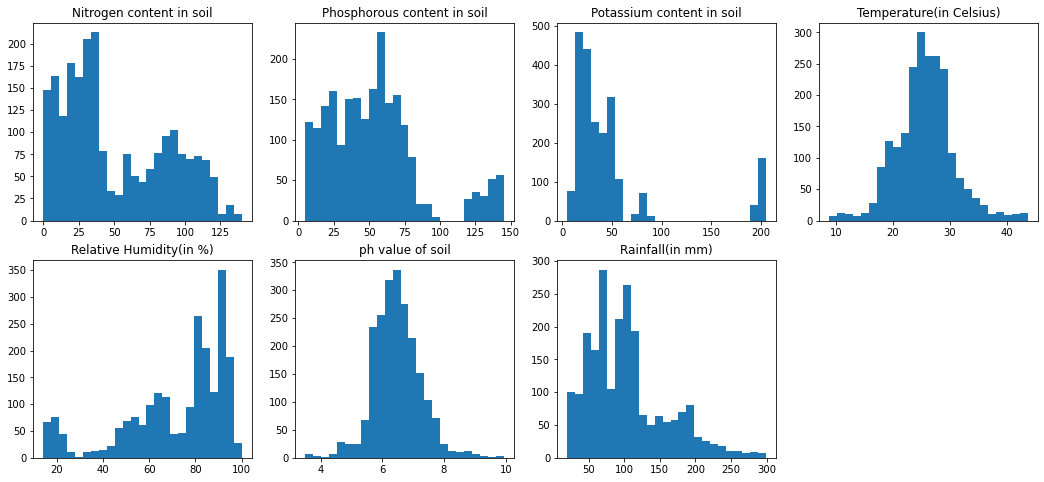

In [11]:
plt.figure(figsize=(18,8))
plt.subplot(2,4,1)

plt.hist(data['N'], bins = 25)

plt.title('Nitrogen content in soil')

plt.subplot(2,4,2)

plt.hist(data['P'], bins = 25)

plt.title('Phosphorous content in soil')

plt.subplot(2,4,3)

plt.hist(data['K'], bins = 25)

plt.title('Potassium content in soil')


plt.subplot(2,4,4)

plt.hist(data['temperature'], bins = 25)

plt.title('Temperature(in Celsius)')

plt.subplot(2,4,5)

plt.hist(data['humidity'], bins = 25)

plt.title('Relative Humidity(in %)')

plt.subplot(2,4,6)

plt.hist(data['ph'], bins = 25)

plt.title('ph value of soil')

plt.subplot(2,4,7)

plt.hist(data['rainfall'], bins = 25)

plt.title('Rainfall(in mm)')

Text(0.5, 0, 'Crops')

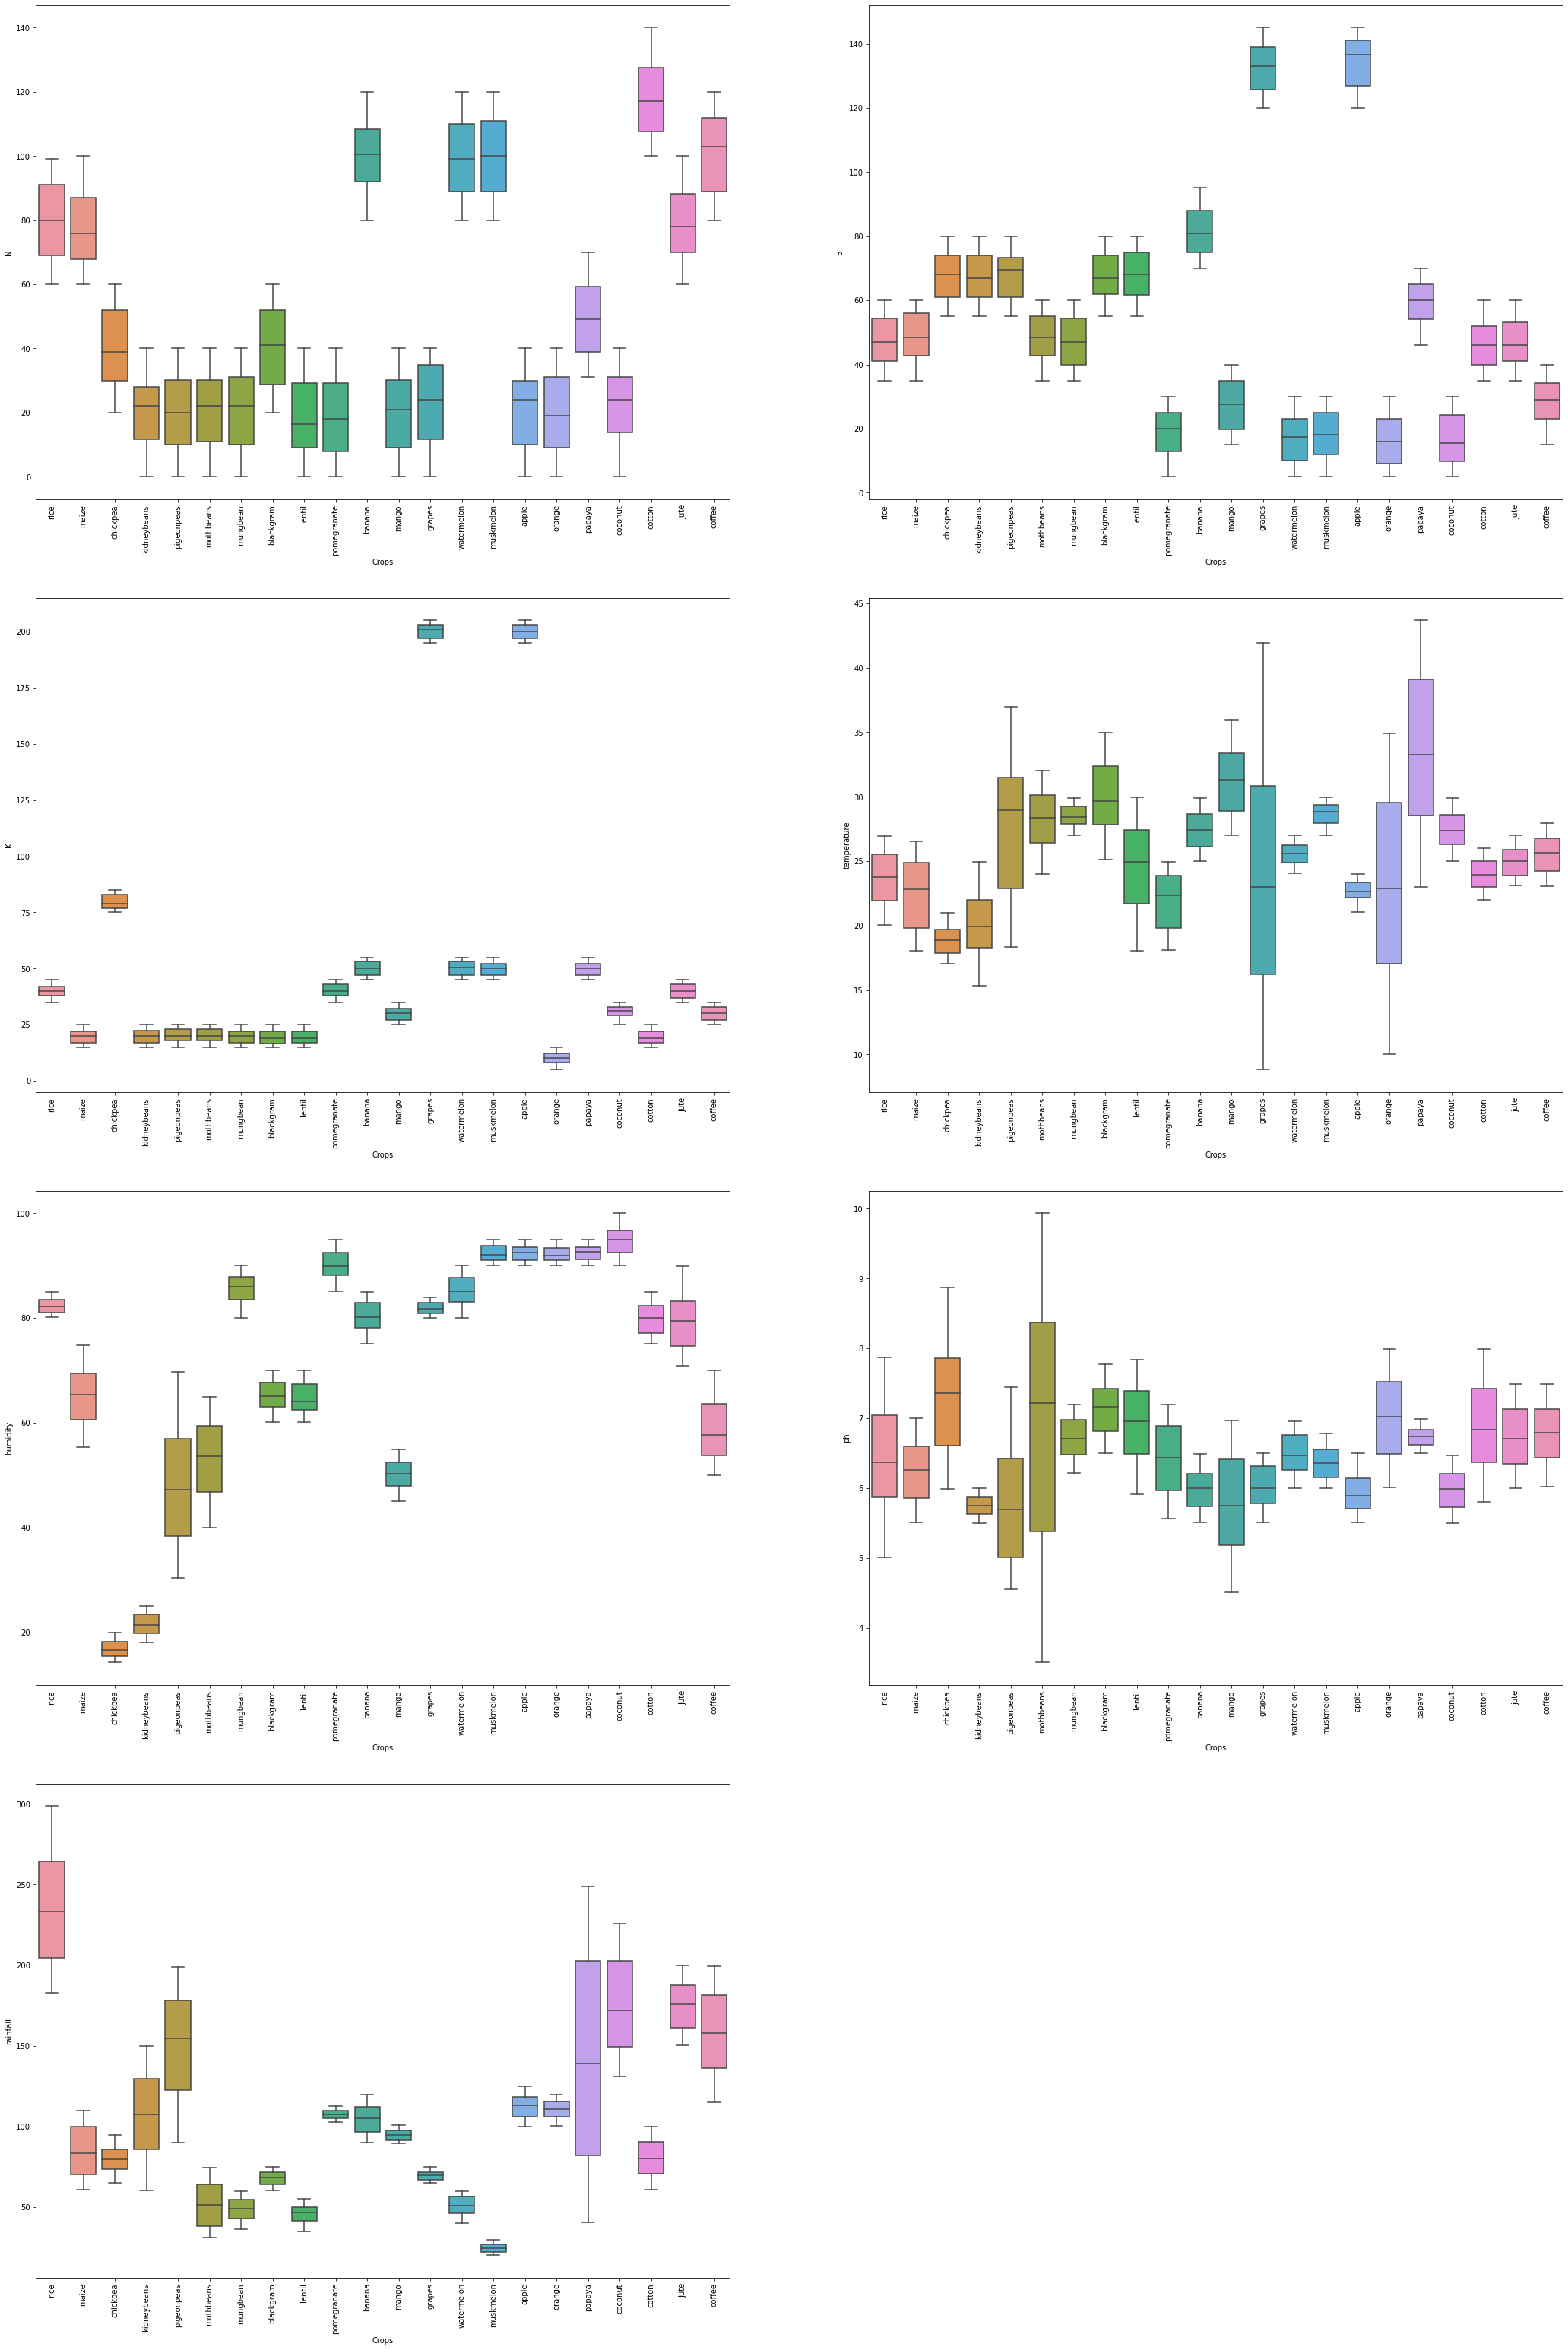

In [12]:
plt.figure(figsize=(36,55))

plt.subplot(4,2,1)
sns.boxplot(x='label',y='N',data=data)
plt.xticks(rotation=90)
plt.xlabel("Crops")

plt.subplot(4,2,2)
sns.boxplot(x='label',y='P',data=data)
plt.xticks(rotation=90)
plt.xlabel("Crops")

plt.subplot(4,2,3)
sns.boxplot(x='label',y='K',data=data)
plt.xticks(rotation=90)
plt.xlabel("Crops")

plt.subplot(4,2,4)
sns.boxplot(x='label',y='temperature',data=data)
plt.xticks(rotation=90)
plt.xlabel("Crops")

plt.subplot(4,2,5)
sns.boxplot(x='label',y='humidity',data=data)
plt.xticks(rotation=90)
plt.xlabel("Crops")

plt.subplot(4,2,6)
sns.boxplot(x='label',y='ph',data=data)
plt.xticks(rotation=90)
plt.xlabel("Crops")

plt.subplot(4,2,7)
sns.boxplot(x='label',y='rainfall',data=data)
plt.xticks(rotation=90)
plt.xlabel("Crops")

### Train Test Split

In [13]:
X = data[['N','P','K','temperature','humidity','ph','rainfall']]
Y = data['label']

#Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

scalar = StandardScaler()
X_scaled_train = scalar.fit(X_train).transform(X_train)
X_scaled_test  = scalar.fit(X_test).transform(X_test)

## Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

A = []
M = []
GNB = GaussianNB()
# training
GNB.fit(X_scaled_train, Y_train)
# predictions
Y_pred = GNB.predict(X_scaled_test)
# Accuracy
acc = accuracy_score(Y_test, Y_pred)
print("\nAccuracy:",acc)
M.append('Naive Bayes(Gaussian)')
A.append(acc)

print(classification_report(Y_test,Y_pred))


Accuracy: 0.9772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      0.85      0.92        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       0.93      1.00      0.97        28
      grapes       1.00      1.00      1.00        23
        jute       0.87      1.00      0.93        34
 kidneybeans       1.00      0.94      0.97        36
      lentil       0.84      0.95      0.89        22
       maize       1.00      0.92      0.96        26
       mango       1.00      1.00      1.00        32
   mothbeans       0.94      1.00      0.97        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        

In [15]:
score = cross_val_score(GNB, X, Y,cv=5) #cross validation score
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

## Support Vector Machine

In [16]:
from sklearn.svm import SVC
a = []
k = ['rbf','linear', 'poly','sigmoid']
for i in k:
    svm = SVC(kernel = i,gamma = 'scale')
    svm.fit(X_scaled_train, Y_train) # training
    Y_pred = svm.predict(X_scaled_test) # predictions
    # Accuracy
    acc = accuracy_score(Y_test, Y_pred) 
    a.append(acc)
df = pd.DataFrame({'kernel':k,'Accuracy':a})  
df

,kernel,Accuracy
0,rbf,0.963636
1,linear,0.962121
2,poly,0.890909
3,sigmoid,0.768182


In [17]:
svm = SVC(kernel = 'rbf',gamma = 'scale')
svm.fit(X_scaled_train, Y_train) # training
Y_pred = svm.predict(X_scaled_test) # predictions
# Accuracy
acc = accuracy_score(Y_test, Y_pred) 
print("\nAccuracy:",acc)
M.append('Support Vector Machine(using rbf kernel)')
A.append(acc)
print(classification_report(Y_test,Y_pred))


Accuracy: 0.9636363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.88      0.88      0.88        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       0.90      1.00      0.95        28
      grapes       1.00      1.00      1.00        23
        jute       0.79      1.00      0.88        34
 kidneybeans       0.95      1.00      0.97        36
      lentil       0.79      1.00      0.88        22
       maize       1.00      0.88      0.94        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.91      0.95        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        

In [18]:
score = cross_val_score(svm, X, Y,cv=5) #cross validation score
score

array([0.98409091, 0.97954545, 0.97954545, 0.97272727, 0.975     ])

## K nearest neighbours

In [19]:
# With Weights = 'Uniform'
from sklearn.neighbors import KNeighborsClassifier
N = []
Test_acc_uni =[]
for i in range(1,40):
    knnr = KNeighborsClassifier(n_neighbors = i, weights='uniform')  
    N.append(i)
    knnr.fit(X_scaled_train, Y_train)
    # accuracy 
    Y_pred = knnr.predict(X_scaled_test)
    result = accuracy_score(Y_test, Y_pred)
    Test_acc_uni.append(result)
    
# With Weights = 'Distance'
Test_acc_dis =[]
for i in range(1,40):
    knnr = KNeighborsClassifier(n_neighbors = i, weights='distance')  
    knnr.fit(X_scaled_train, Y_train)
    # accuracy 
    Y_pred = knnr.predict(X_scaled_test)
    result = accuracy_score(Y_test, Y_pred)
    Test_acc_dis.append(result)

    
d = {'n_neighbors':N,'Testing Accuracy(Using Uniform weights)':Test_acc_uni,
    'Testing Accuracy(Using distance weights)':Test_acc_dis}
d1 = pd.DataFrame(d)
d1

,n_neighbors,Testing Accuracy(Using Uniform weights),Testing Accuracy(Using distance weights)
0,1,0.957576,0.957576
1,2,0.951515,0.957576
2,3,0.959091,0.962121
3,4,0.950000,0.957576
4,5,0.954545,0.960606
5,6,0.948485,0.962121
6,7,0.946970,0.953030
7,8,0.939394,0.953030
8,9,0.940909,0.943939
9,10,0.936364,0.946970


Clearly visible from dataframe d1 that K nearest neighbour with 6 neighbours and weights = 'distance' performs best

In [20]:
knnr = KNeighborsClassifier(n_neighbors = 6, weights='distance')  
knnr.fit(X_scaled_train, Y_train)
# accuracy 
Y_pred = knnr.predict(X_scaled_test)
acc = accuracy_score(Y_test, Y_pred) 
print("\nAccuracy:",acc)
M.append('K Nearest Neighbour(k = 6)')
A.append(acc)
print(classification_report(Y_test,Y_pred))


Accuracy: 0.9621212121212122
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.92      0.92      0.92        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       0.85      1.00      0.92        28
      grapes       1.00      1.00      1.00        23
        jute       0.82      0.97      0.89        34
 kidneybeans       0.95      1.00      0.97        36
      lentil       0.79      1.00      0.88        22
       maize       1.00      0.81      0.89        26
       mango       0.97      1.00      0.98        32
   mothbeans       1.00      0.91      0.95        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        

In [21]:
score = cross_val_score(knnr, X, Y,cv=5) #cross validation score
score

array([0.97727273, 0.98409091, 0.98636364, 0.98636364, 0.97727273])

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=16)
DT.fit(X_scaled_train, Y_train)
# accuracy 
Y_pred = DT.predict(X_scaled_test)
acc = accuracy_score(Y_test, Y_pred) 
print("\nAccuracy:",acc)
M.append('Decision Tree(Maximum depth =16)')
A.append(acc)
print(classification_report(Y_test,Y_pred))


Accuracy: 0.9409090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       0.93      1.00      0.96        26
   blackgram       1.00      0.69      0.82        26
    chickpea       1.00      0.97      0.99        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       0.93      1.00      0.97        28
      grapes       1.00      1.00      1.00        23
        jute       0.85      0.82      0.84        34
 kidneybeans       1.00      0.69      0.82        36
      lentil       0.67      1.00      0.80        22
       maize       1.00      0.96      0.98        26
       mango       1.00      1.00      1.00        32
   mothbeans       0.89      0.91      0.90        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      0.88      0.93        24
      orange       1.00      1.00      1.00        

In [23]:
score = cross_val_score(DT, X, Y,cv=5) #cross validation score
score

array([0.98863636, 0.975     , 0.99318182, 0.97954545, 0.975     ])

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
# classifier
RF = RandomForestClassifier()
# training
RF.fit(X_scaled_train, Y_train)
# accuracy 
Y_pred = RF.predict(X_scaled_test)
acc = accuracy_score(Y_test, Y_pred) 
print("\nAccuracy:",acc)
M.append('Random Forest')
A.append(acc)
print(classification_report(Y_test,Y_pred))


Accuracy: 0.9651515151515152
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      0.69      0.82        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        23
        jute       0.87      1.00      0.93        34
 kidneybeans       1.00      0.83      0.91        36
      lentil       0.67      1.00      0.80        22
       maize       1.00      0.96      0.98        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.91      0.95        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        

In [25]:
score = cross_val_score(RF, X, Y,cv=5) #cross validation score
score

array([0.99772727, 0.99090909, 0.99545455, 0.99545455, 0.99090909])

In [26]:
q = pd.DataFrame({'Model':M,'Acuracy on Test Dataset':A})
q

,Model,Acuracy on Test Dataset
0,Naive Bayes(Gaussian),0.977273
1,Support Vector Machine(using rbf kernel),0.963636
2,K Nearest Neighbour(k = 6),0.962121
3,Decision Tree(Maximum depth =16),0.940909
4,Random Forest,0.965152


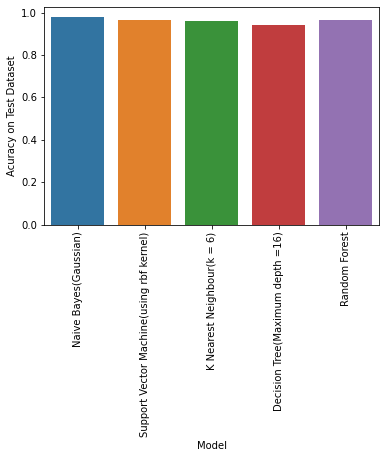

In [27]:
sns.barplot(x = 'Model', y = 'Acuracy on Test Dataset', data = q)
plt.xticks(rotation = 90) 
# Show the plot
plt.show()